<a href="https://colab.research.google.com/github/naveenthumati95/time-series-analysis-models/blob/main/statistical_tsa_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [43]:
# before diving into ARMA and other models, we need to know about stationarity, ADF test, ACF, PACF
# stationarity -> mean and var constant over time
# auto cov -> depends only on lag, not on time
# AR, MA, ARMA assumes that the data is stationary
# if data is not stationary -> use differencing

# Augmented Dickey-Fuller (ADF) Test
from statsmodels.tsa.stattools import adfuller

# Example: Random Walk (non-stationary)
np.random.seed(42)
X=np.cumsum(np.random.randn(100))  # cumulative sum creates trend

result=adfuller(X)
print("ADF Statistic:",result[0])
print("p-value:",result[1]) # p-value <= 0.05  --> stationary
print("Critical Values:",result[4])

ADF Statistic: -1.3583317659818992
p-value: 0.6020814791099098
Critical Values: {'1%': np.float64(-3.498198082189098), '5%': np.float64(-2.891208211860468), '10%': np.float64(-2.5825959973472097)}


In [44]:
# we can see that the above data is non stationary, now we apply differencing to make it stationary
X_diff=np.diff(X) # same d is kept in ARIMA
result2=adfuller(X_diff)
print("After differencing, p-value:",result2[1]) # most likely the data becomes stationary.

After differencing, p-value: 1.800687720719554e-17


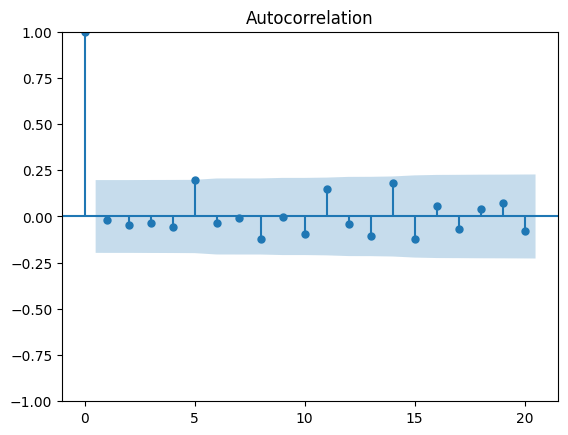

In [45]:
# now we have stationary data we need to detect MA(q) process
# ACF (Auto correlation Function) -> shows correlation of series with its own lagged values
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(X_diff,lags=20)
plt.show()
# from the below graph we can see that the day 5 is the last day which correlation is greater than threshold value, this is selected as q for MA(q)

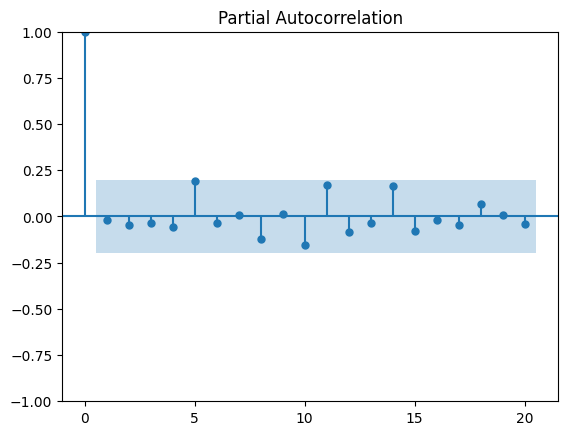

In [46]:
# PACF (Partial Auto correlation Function) -> show correlation of series with its lag after removing effects of shorter lags
# help detect AR(p)
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(X_diff,lags=20)
plt.show()
# from the below graph we can see that the day 5 is the last day which partial correlation is greater than threshold value, this is selected as p for AR(p)

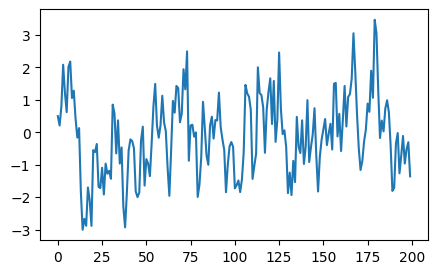

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -268.801
Date:                Mon, 29 Sep 2025   AIC                            543.602
Time:                        08:59:57   BIC                            553.497
Sample:                             0   HQIC                           547.606
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1257      0.187     -0.670      0.503      -0.493       0.242
ar.L1          0.6478      0.056     11.570      0.000       0.538       0.757
sigma2         0.8585      0.086      9.974      0.0

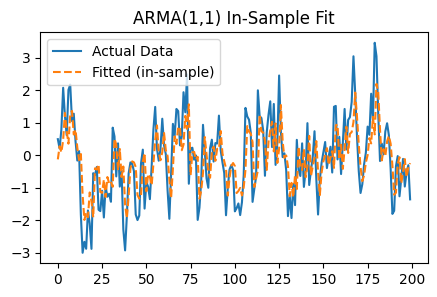

In [47]:
# AR impl: X_t = 0.7 * X_{t-1} + e_t
# AR(lag) poly: X_t + (-0.7) * X_{t-1} = e_t  -> [1,-0.7]
ar=np.array([1,-0.7])
# no MA term
ma=np.array([1])
ar_object=ArmaProcess(ar,ma)

# simulate data
np.random.seed(42)
ar_data=ar_object.generate_sample(nsample=200)

plt.figure(figsize=(5,3))
plt.plot(ar_data)
plt.show()

model_ar=ARIMA(ar_data,order=(1,0,0))
model_ar_fit=model_ar.fit()
print(model_ar_fit.summary())

# In-sample fitted values
fitted_values=model_ar_fit.fittedvalues

plt.figure(figsize=(5,3))
plt.plot(ar_data,label="Actual Data")
plt.plot(fitted_values,label="Fitted (in-sample)",linestyle="--")
plt.legend()
plt.title("ARMA(1,1) In-Sample Fit")
plt.show()


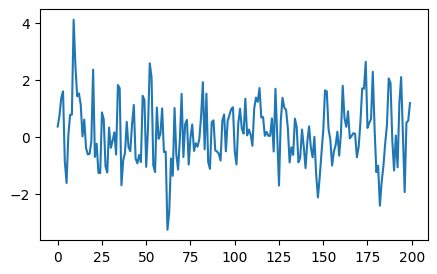

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -280.570
Date:                Mon, 29 Sep 2025   AIC                            567.140
Time:                        08:59:58   BIC                            577.035
Sample:                             0   HQIC                           571.144
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1283      0.102      1.257      0.209      -0.072       0.328
ma.L1          0.4559      0.062      7.304      0.000       0.334       0.578
sigma2         0.9672      0.083     11.599      0.0

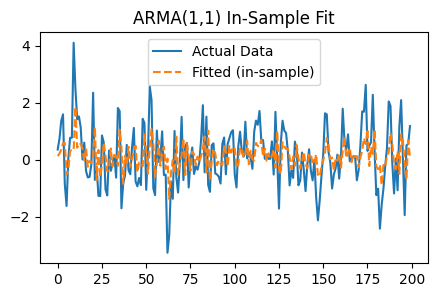

In [48]:
# MA impl: X_t = e_t + 0.5 * e_{t-1}
# lag polynomial: same as above
# no ar term
ar=np.array([1])
ma=np.array([1,0.5])
ma_object=ArmaProcess(ar,ma)

# simulate data
ma_data=ma_object.generate_sample(nsample=200)

plt.figure(figsize=(5,3))
plt.plot(ma_data)
plt.show()

model_ma=ARIMA(ma_data,order=(0,0,1))
model_ma_fit=model_ma.fit()
print(model_ma_fit.summary())

# In-sample fitted values
fitted_values=model_ma_fit.fittedvalues

plt.figure(figsize=(5,3))
plt.plot(ma_data, label="Actual Data")
plt.plot(fitted_values, label="Fitted (in-sample)", linestyle="--")
plt.legend()
plt.title("ARMA(1,1) In-Sample Fit")
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -281.145
Date:                Mon, 29 Sep 2025   AIC                            570.289
Time:                        08:59:58   BIC                            583.483
Sample:                             0   HQIC                           575.628
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3043      0.245     -1.243      0.214      -0.784       0.176
ar.L1          0.5647      0.069      8.197      0.000       0.430       0.700
ma.L1          0.5173      0.078      6.637      0.0

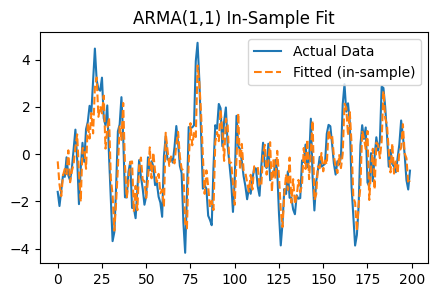

In [49]:
# ARMA process impl: X_t = 0.6 * X_{t-1} + e_t + 0.4 * e_{t-1}
ar=np.array([1,-0.6])
ma=np.array([1,0.4])
arma_object=ArmaProcess(ar,ma)

arma_data=arma_object.generate_sample(nsample=200)

model_arma=ARIMA(arma_data,order=(1,0,1))
model_arma_fit=model_arma.fit()
print(model_arma_fit.summary())

# In-sample fitted values
# In-sample fitted values
fitted_values=model_arma_fit.fittedvalues

plt.figure(figsize=(5,3))
plt.plot(arma_data, label="Actual Data")
plt.plot(fitted_values, label="Fitted (in-sample)", linestyle="--")
plt.legend()
plt.title("ARMA(1,1) In-Sample Fit")
plt.show()

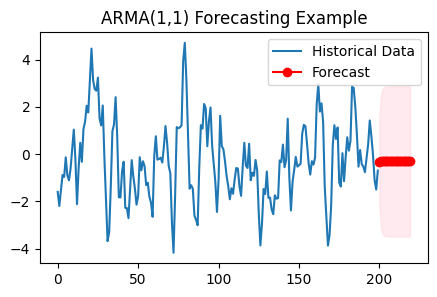

In [50]:
# we can see from above that the ARMA model which is a combination of ar and ma give pretty accurate answers.
# now we concentrate on forecasting future values

forecast_object=model_arma_fit.get_forecast(steps=20)

# mean predictions
forecast_mean=forecast_object.predicted_mean

# confidence intervals (95%)
forecast_ci=forecast_object.conf_int()

plt.figure(figsize=(5,3))

# Plot actual historical data
plt.plot(arma_data, label="Historical Data")

# Plot forecasted mean
plt.plot(range(len(arma_data), len(arma_data)+20), forecast_mean,
         color="red", marker="o", label="Forecast")

# Plot confidence intervals (shaded area)
plt.fill_between(range(len(arma_data), len(arma_data)+20),
                 forecast_ci[:,0],
                 forecast_ci[:,1], color="pink", alpha=0.3)

plt.legend()
plt.title("ARMA(1,1) Forecasting Example")
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -303.730
Date:                Mon, 29 Sep 2025   AIC                            613.459
Time:                        08:59:58   BIC                            623.339
Sample:                             0   HQIC                           617.458
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6162      0.202     -3.043      0.002      -1.013      -0.219
ma.L1          0.7702      0.169      4.565      0.000       0.440       1.101
sigma2         1.2389      0.135      9.174      0.0

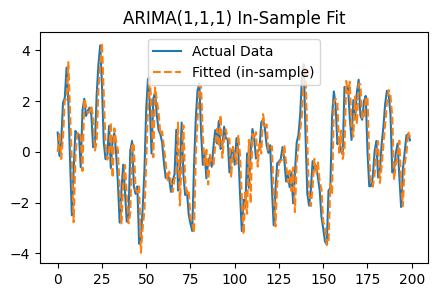

In [51]:
# ARMA process impl: X_t = 0.6 * X_{t-1} + e_t + 0.4 * e_{t-1}
ar=np.array([1,-0.6])
ma=np.array([1,0.4])
arima_object=ArmaProcess(ar,ma)

arima_data=arima_object.generate_sample(nsample=200)

model_arima=ARIMA(arima_data,order=(1,1,1))
model_arima_fit=model_arima.fit()
print(model_arima_fit.summary())

# In-sample fitted values
# In-sample fitted values
fitted_values=model_arima_fit.fittedvalues

plt.figure(figsize=(5,3))
plt.plot(arima_data, label="Actual Data")
plt.plot(fitted_values, label="Fitted (in-sample)", linestyle="--")
plt.legend()
plt.title("ARIMA(1,1,1) In-Sample Fit")
plt.show()
# we can see that ARIMA does very good job compared to ARMA

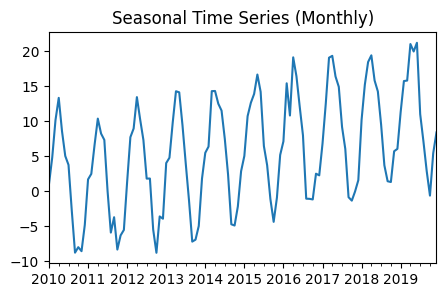

In [52]:
# SARIMA (Seasonal ARIMA) -> extends ARIMA by adding Seasonal terms
# seasonal part(P,D,Q,s)
# P -> Seasonal AR order  Q -> Seasonal MA order  D -> Seasonal diff order  s -> length of the season
# use when ACF/PACF plots show repeating spikes at multiples of some lag
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# simulating seasonal data
np.random.seed(42)
n_periods=120  # 10 years of monthly data
time=np.arange(n_periods)
seasonal_pattern=10*np.sin(2*np.pi*time/12)  # yearly seasonality
trend=0.1*time
noise=np.random.normal(0,2,n_periods)
data=trend+seasonal_pattern+noise

# converting to pandas Series with datetime index
dates=pd.date_range(start="2010-01",periods=n_periods,freq="ME")
series=pd.Series(data,index=dates)

# visualising the data
series.plot(title="Seasonal Time Series (Monthly)",figsize=(5,3))
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -231.826
Date:                            Mon, 29 Sep 2025   AIC                            473.652
Time:                                    09:00:00   BIC                            487.017
Sample:                                01-31-2010   HQIC                           479.070
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0016      0.130      0.013      0.990      -0.254       0.257
ma.L1         -0.9994      3.803   

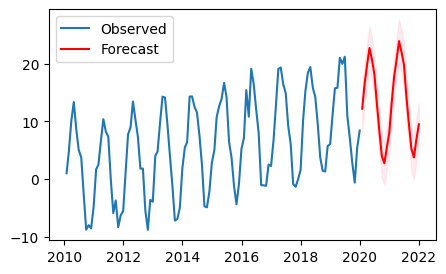

In [53]:
model=SARIMAX(series,order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit(disp=False)

print(results.summary())

# forecasting next 24 months
forecast=results.get_forecast(steps=24)
forecast_index=pd.date_range(series.index[-1]+pd.offsets.MonthEnd(),periods=24,freq="ME")

# Get prediction and confidence intervals
pred_mean=forecast.predicted_mean
conf_int=forecast.conf_int()

# Plot forecast
plt.figure(figsize=(5,3))
plt.plot(series,label="Observed")
plt.plot(forecast_index,pred_mean,label="Forecast",color="red")
plt.fill_between(forecast_index,conf_int.iloc[:, 0],conf_int.iloc[:, 1],color="pink",alpha=0.3)
plt.legend()
plt.show()